In [6]:
!python3 --version

Python 3.10.11


In [7]:
!pip3 install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.2 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [9]:
import pandas as pd


df = pd.read_csv("Dataset.csv")

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace("'", "", regex=False)

if df['zipcodeOri'].nunique() == 1:
    df.drop(columns=['zipcodeOri'], inplace=True)

df['age'] = df['age'].astype('category')
df['gender'] = df['gender'].astype('category')
df['category'] = df['category'].astype('category')
df['merchant'] = df['merchant'].astype('category')
df['customer'] = df['customer'].astype('category')
df['zipMerchant'] = df['zipMerchant'].astype('category')

df.rename(columns={
    'step': 'time_step',
    'zipMerchant': 'merchant_zip',
}, inplace=True)


print("Cleaned dataset columns:")
print(df.columns)
print("\n🔹 Sample data:")
print(df)


Cleaned dataset columns:
Index(['time_step', 'customer', 'age', 'gender', 'merchant', 'merchant_zip',
       'category', 'amount', 'fraud'],
      dtype='object')

🔹 Sample data:
        time_step     customer age gender     merchant merchant_zip  \
0              11  C1760492708   1      F  M1823072687        28007   
1             172  C1222389110   3      M  M1823072687        28007   
2             106   C879949041   3      F  M1823072687        28007   
3              86   C409740988   5      M  M1823072687        28007   
4             152   C671449181   3      F   M692898500        28007   
...           ...          ...  ..    ...          ...          ...   
535173         40  C1913044357   5      F   M348934600        28007   
535174         86  C1341159565   2      F   M348934600        28007   
535175        117  C1048588440   6      M  M1823072687        28007   
535176         47  C1134333439   3      M   M348934600        28007   
535177         43   C994739890   5      

In [11]:
fraud_df = df[df['fraud'] == 1]
print(fraud_df.head())

     time_step     customer age gender    merchant merchant_zip  \
297        121  C1035154937   6      M  M980657600        28007   
349         62  C1564260047   3      F  M348875670        28007   
394        125  C2118328869   2      F  M933210764        28007   
559         83   C439977323   1      M  M480139044        28007   
695         36  C1685492470   2      F  M980657600        28007   

             category  amount  fraud  
297  es_sportsandtoys   53.15      1  
349  es_hotelservices  321.46      1  
394  es_sportsandtoys  278.73      1  
559         es_health    3.63      1  
695  es_sportsandtoys  678.30      1  


In [13]:
fraud_count = df[df['fraud'] == 1].shape[0]
print(fraud_count)

6492


In [14]:
print(df.isnull().sum())


time_step       0
customer        0
age             0
gender          0
merchant        0
merchant_zip    0
category        0
amount          0
fraud           0
dtype: int64


In [15]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [16]:
print(df['gender'].unique())
print(df['age'].unique())
print(df['category'].unique())


['F', 'M', 'E', 'U']
Categories (4, object): ['E', 'F', 'M', 'U']
['1', '3', '5', '2', '4', '6', 'U', '0']
Categories (8, object): ['0', '1', '2', '3', '4', '5', '6', 'U']
['es_transportation', 'es_health', 'es_fashion', 'es_wellnessandbeauty', 'es_food', ..., 'es_hotelservices', 'es_contents', 'es_leisure', 'es_travel', 'es_otherservices']
Length: 15
Categories (15, object): ['es_barsandrestaurants', 'es_contents', 'es_fashion', 'es_food', ..., 'es_tech', 'es_transportation', 'es_travel', 'es_wellnessandbeauty']


In [19]:
df['age'] = df['age'].replace({'U': 'Unknown', '0': 'Unknown'})
print(df['age'].value_counts())
print(df['age'].unique())

age
2          168425
3          132505
4           98068
5           56465
1           52384
6           24071
Unknown      3260
Name: count, dtype: int64
['1', '3', '5', '2', '4', '6', 'Unknown']
Categories (7, object): ['1', '2', '3', '4', '5', '6', 'Unknown']


In [20]:
df['gender'] = df['gender'].replace({'E': 'Unknown', 'U': 'Unknown'})
print(df['gender'].value_counts())


gender
F          292090
M          241567
Unknown      1521
Name: count, dtype: int64


/var/folders/8w/4fd8v4kx47n9ndgjn261sx_c0000gn/T/ipykernel_86525/3695726632.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['gender'] = df['gender'].replace({'E': 'Unknown', 'U': 'Unknown'})


In [21]:
df.head()

,time_step,customer,age,gender,merchant,merchant_zip,category,amount,fraud
0,11,C1760492708,1,F,M1823072687,28007,es_transportation,52.35,0
1,172,C1222389110,3,M,M1823072687,28007,es_transportation,14.75,0
2,106,C879949041,3,F,M1823072687,28007,es_transportation,3.73,0
3,86,C409740988,5,M,M1823072687,28007,es_transportation,61.42,0
4,152,C671449181,3,F,M692898500,28007,es_health,9.05,0


In [22]:
pip install pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 19.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.
/var/folders/8w/4fd8v4kx47n9ndgjn261sx_c0000gn/T/ipykernel_86525/3607440480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Set2')


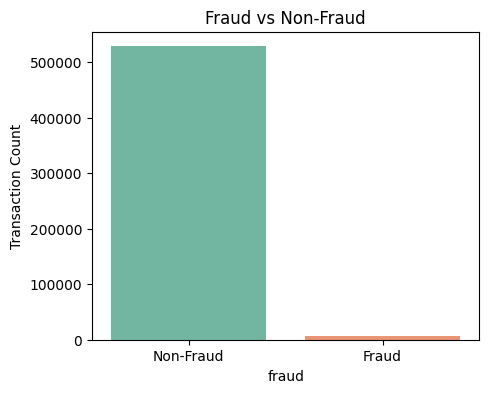

Fraud Rate: 1.21 %


/var/folders/8w/4fd8v4kx47n9ndgjn261sx_c0000gn/T/ipykernel_86525/3607440480.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Blues_r')


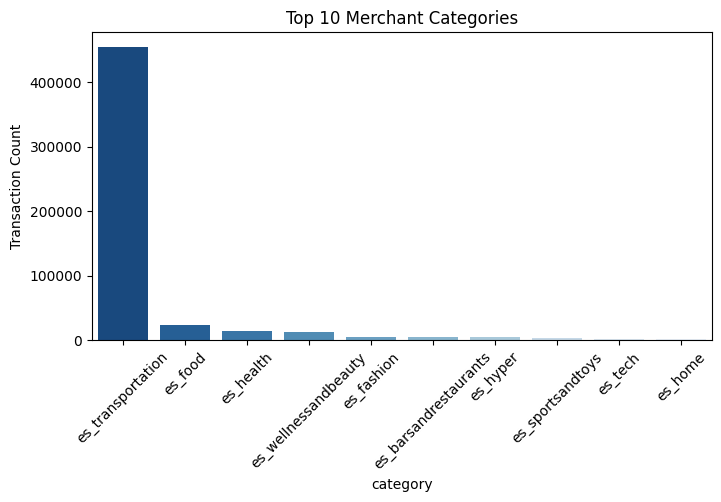

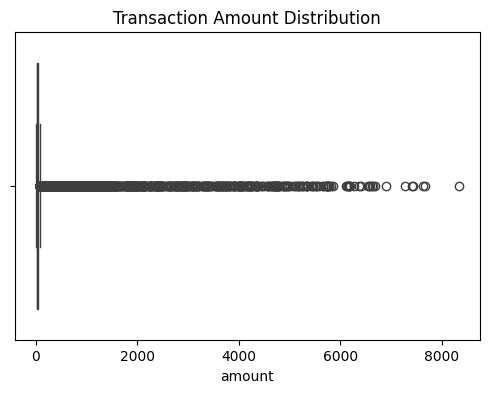

count    535178.000000
mean         37.945166
std         112.585244
min           0.000000
25%          13.730000
50%          26.900000
75%          42.570000
max        8329.960000
Name: amount, dtype: float64


/var/folders/8w/4fd8v4kx47n9ndgjn261sx_c0000gn/T/ipykernel_86525/3607440480.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='Reds')


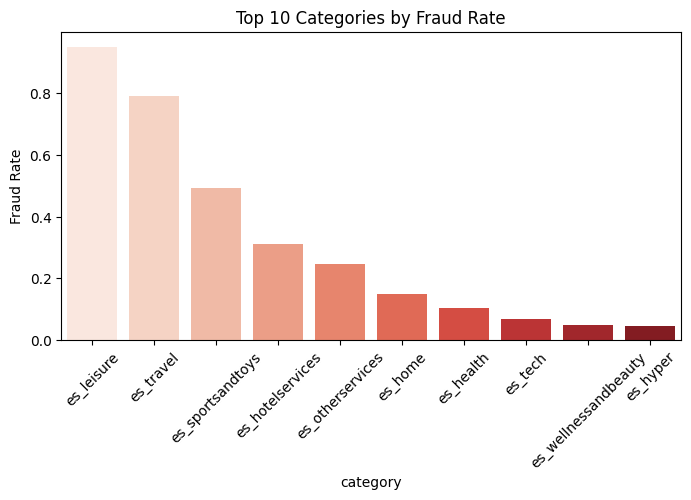

/var/folders/8w/4fd8v4kx47n9ndgjn261sx_c0000gn/T/ipykernel_86525/3607440480.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values, palette='Set1')


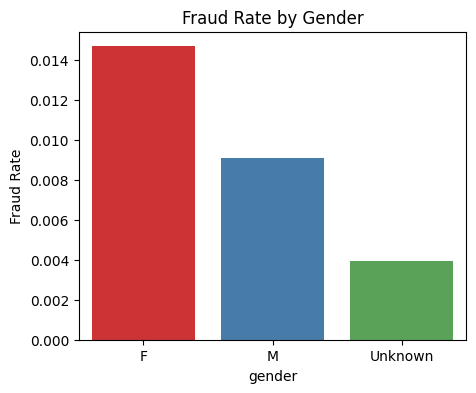

/var/folders/8w/4fd8v4kx47n9ndgjn261sx_c0000gn/T/ipykernel_86525/3607440480.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_age.index, y=fraud_by_age.values, palette='Purples')


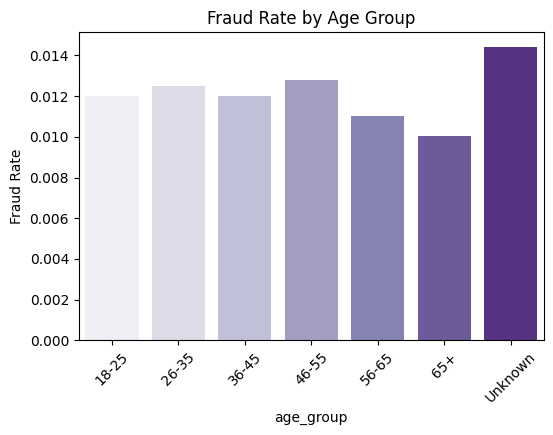

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv("Dataset.csv")

# Remove quotes from string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace("'", "", regex=False)

# Drop zipcodeOri if constant
if 'zipcodeOri' in df.columns and df['zipcodeOri'].nunique() == 1:
    df.drop(columns=['zipcodeOri'], inplace=True)

# Fix age and gender values
df['age'] = df['age'].replace({'U': 'Unknown', '0': 'Unknown'})
df['gender'] = df['gender'].replace({'U': 'Unknown', 'E': 'Unknown'})

# Age group mapping
age_map = {
    '1': '18-25', '2': '26-35', '3': '36-45',
    '4': '46-55', '5': '56-65', '6': '65+',
    'Unknown': 'Unknown'
}
df['age_group'] = df['age'].map(age_map)


# 1. Fraud Distribution

fraud_counts = df['fraud'].value_counts()
plt.figure(figsize=(5, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Set2')
plt.title('Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Transaction Count')
plt.show()

print("Fraud Rate:", round(df['fraud'].mean() * 100, 2), "%")

# 2. Top Categories by Count

top_categories = df['category'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Blues_r')
plt.title('Top 10 Merchant Categories')
plt.xticks(rotation=45)
plt.ylabel('Transaction Count')
plt.show()

# -------------------------------
# 💸 3. Amount Distribution
# -------------------------------
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['amount'])
plt.title('Transaction Amount Distribution')
plt.show()

print(df['amount'].describe())

# -------------------------------
# 🔍 4. Fraud Rate by Category
# -------------------------------
fraud_by_category = df.groupby('category')['fraud'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='Reds')
plt.title('Top 10 Categories by Fraud Rate')
plt.xticks(rotation=45)
plt.ylabel('Fraud Rate')
plt.show()

# -------------------------------
# 🧑‍🤝‍🧑 5. Fraud Rate by Gender
# -------------------------------
fraud_by_gender = df.groupby('gender')['fraud'].mean()
plt.figure(figsize=(5, 4))
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values, palette='Set1')
plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate')
plt.show()

# -------------------------------
# 👵 6. Fraud Rate by Age Group
# -------------------------------
fraud_by_age = df.groupby('age_group')['fraud'].mean().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_by_age.index, y=fraud_by_age.values, palette='Purples')
plt.title('Fraud Rate by Age Group')
plt.xticks(rotation=45)
plt.ylabel('Fraud Rate')
plt.show()


In [25]:
!pip3 install pandas scikit-learn matplotlib seaborn imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 23.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 5.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Remove quotes from string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace("'", "", regex=False)

# Drop constant column
if 'zipcodeOri' in df.columns and df['zipcodeOri'].nunique() == 1:
    df.drop(columns=['zipcodeOri'], inplace=True)

# Replace invalid values
df['gender'] = df['gender'].replace({'U': 'Unknown', 'E': 'Unknown'})
df['age'] = df['age'].replace({'U': 'Unknown', '0': 'Unknown'})

# Select features to use
features = ['step', 'amount', 'gender', 'age', 'category']
X = df[features].copy()

# Label encode categorical columns
for col in ['gender', 'age', 'category']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
X[['step', 'amount']] = scaler.fit_transform(X[['step', 'amount']])

# Target labels
y = df['fraud']



0         0
1         0
2         0
3         0
4         0
         ..
535173    0
535174    0
535175    0
535176    0
535177    0
Name: fraud, Length: 535178, dtype: int64


In [28]:
!pip3 install tensorflow

  Using cached tensorflow-2.19.0-cp310-cp310-macosx_12_0_arm64.whl (252.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Using cached ml_dtypes-0.5.1-cp310-cp310-macosx_10_9_universal2.whl (671 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.1/418.1 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Using cached wrapt-1.17.2-cp310-cp310-macosx_11_0_arm64.whl (38 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
  Using cached numpy-2.1.3-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl (25.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.5 MB/

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Split data: Only use non-fraud data to train
X_nonfraud = X[y == 0]
X_fraud = X[y == 1]  # save for later

# Split non-fraud data into train and validation
X_train, X_val = train_test_split(X_nonfraud, test_size=0.2, random_state=42)

# Build autoencoder model
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(X_val, X_val),
    verbose=1
)


Epoch 1/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - loss: 5.4535 - val_loss: 9.9945e-04
Epoch 2/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - loss: 8.0562e-04 - val_loss: 4.4472e-04
Epoch 3/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 4.1115e-04 - val_loss: 2.8695e-04
Epoch 4/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - loss: 2.6713e-04 - val_loss: 1.7420e-04
Epoch 5/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 1.6217e-04 - val_loss: 1.1964e-04
Epoch 6/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - loss: 1.0953e-04 - val_loss: 6.2567e-05
Epoch 7/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 7.3568e-05 - val_loss: 6.3223e-05
Epoch 8/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 6.2090e-05 - val_loss: 8.3534e-05
Epoch 9/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 5.2469e-05 - val_loss: 2.2667e-05
Epoch 10/20
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 4.2125e-05 - val_loss: 6.8050e-05
Epoch 11/20
1653/1653 ━

In [41]:
# Predict on all data
X_pred = autoencoder.predict(X)
mse = np.mean(np.power(X - X_pred, 2), axis=1)

# Set threshold (can tune later)
threshold = np.percentile(mse[y == 0], 95)  # 95th percentile of non-fraud

# Predict fraud based on reconstruction error
autoencoder_preds = (mse > threshold).astype(int)
autoencoder.save("autoencoder_model.keras")



16725/16725 ━━━━━━━━━━━━━━━━━━━━ 3s 167us/step


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y, autoencoder_preds))
print("\nClassification Report:\n", classification_report(y, autoencoder_preds))


Confusion Matrix:
 [[502251  26435]
 [  3378   3114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    528686
           1       0.11      0.48      0.17      6492

    accuracy                           0.94    535178
   macro avg       0.55      0.71      0.57    535178
weighted avg       0.98      0.94      0.96    535178



In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=float(len(y[y == 1]) / len(y)),  # known fraud ratio
    random_state=42
)

# Fit the model to ALL data (unsupervised)
iso_forest.fit(X)

# Predict anomaly scores (-1 for anomaly, 1 for normal)
iso_preds_raw = iso_forest.predict(X)

# Convert to binary format: 1 = fraud, 0 = non-fraud
iso_preds = [1 if x == -1 else 0 for x in iso_preds_raw]

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y, iso_preds))
print("\nClassification Report:\n", classification_report(y, iso_preds))

import joblib
joblib.dump(iso_forest, "isolation_forest_model.pkl")



Confusion Matrix:
 [[525586   3100]
 [  3100   3392]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    528686
           1       0.52      0.52      0.52      6492

    accuracy                           0.99    535178
   macro avg       0.76      0.76      0.76    535178
weighted avg       0.99      0.99      0.99    535178



['isolation_forest_model.pkl']

In [34]:
import numpy as np

# Option 1: OR ensemble (either model says fraud → fraud)
ensemble_or = ((np.array(autoencoder_preds) + np.array(iso_preds)) >= 1).astype(int)

# Option 2: AND ensemble (both must say fraud → fraud)
ensemble_and = ((np.array(autoencoder_preds) + np.array(iso_preds)) == 2).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("------ OR Ensemble (Autoencoder OR IsolationForest) ------")
print(confusion_matrix(y, ensemble_or))
print(classification_report(y, ensemble_or))

print("------ AND Ensemble (Autoencoder AND IsolationForest) ------")
print(confusion_matrix(y, ensemble_and))
print(classification_report(y, ensemble_and))


------ OR Ensemble (Autoencoder OR IsolationForest) ------
[[500951  27735]
 [  1893   4599]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    528686
           1       0.14      0.71      0.24      6492

    accuracy                           0.94    535178
   macro avg       0.57      0.83      0.60    535178
weighted avg       0.99      0.94      0.96    535178

------ AND Ensemble (Autoencoder AND IsolationForest) ------
[[526886   1800]
 [  3414   3078]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    528686
           1       0.63      0.47      0.54      6492

    accuracy                           0.99    535178
   macro avg       0.81      0.74      0.77    535178
weighted avg       0.99      0.99      0.99    535178



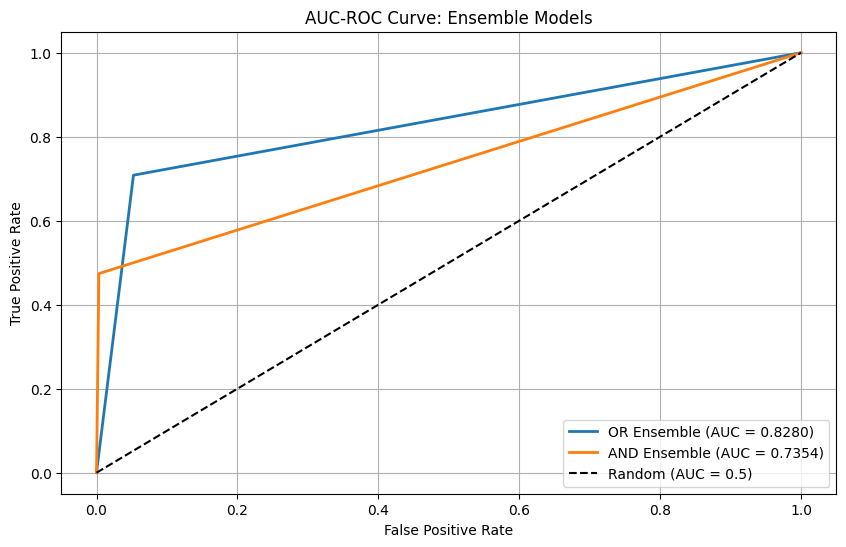

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Compute FPR, TPR for both ensemble methods
fpr_or, tpr_or, _ = roc_curve(y, ensemble_or)
fpr_and, tpr_and, _ = roc_curve(y, ensemble_and)

# Compute AUC scores
auc_or = roc_auc_score(y, ensemble_or)
auc_and = roc_auc_score(y, ensemble_and)

# Plot the ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_or, tpr_or, label=f"OR Ensemble (AUC = {auc_or:.4f})", linewidth=2)
plt.plot(fpr_and, tpr_and, label=f"AND Ensemble (AUC = {auc_and:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve: Ensemble Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [45]:
import joblib

# Save the trained autoencoder
autoencoder.save("autoencoder_model.keras")

# Save Isolation Forest model
joblib.dump(iso_forest, "isolation_forest_model.pkl")

# Save the StandardScaler
joblib.dump(scaler, "scaler.pkl")
# make sure you have a dict like {'gender': le_gender, ...}


['scaler.pkl']

In [44]:
le = LabelEncoder()
X[col] = le.fit_transform(X[col])
encoders = {}
for col in ['gender', 'age', 'category']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # store encoder

import joblib

joblib.dump(encoders, "encoders.pkl")


['encoders.pkl']